# Introduction
The Bay Area's bike share system is called Ford GoBike. Bay Area Bike Share began as a regional trial program in 2013, with 700 bikes and 70 stations spread across San Francisco and San Jose. Ford GoBike will have 7,000 bikes throughout San Francisco, the East Bay, and San Jose after the expansion is complete.
Ford GoBike, like other bike sharing systems, is made up of a fleet of specifically built, strong, and durable bikes that are docked at various locations across the city. The bikes may be unlocked at any station in the system and returned to any other, making them perfect for one-way excursions. Bike share is used to travel to work or school, do errands, and attend appointments.

## Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import os
import datetime

## Dataset Overview

My source data was Ford GoBike System Data: https://www.fordgobike.com/system-data This data collection contains data about individual bike-sharing system trips. If a complete year of coverage is needed, multiple data files will need to be linked together. This document delves into the public trip data for the Ford GoBike, which includes about 1,850,000 bike rides from FY2018. The trip start/end time, but also additional variables like user type, gender, and age, were all included in the data.

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
149118,414,2019-02-06 19:56:46.5360,2019-02-06 20:03:41.1170,355.0,23rd St at Tennessee St,37.755367,-122.388795,364.0,China Basin St at 3rd St,37.772000,-122.389970,4629,Subscriber,1992.0,Male,No
117289,435,2019-02-11 22:57:15.4970,2019-02-11 23:04:30.6580,124.0,19th St at Florida St,37.760447,-122.410807,115.0,Jackson Playground,37.765026,-122.398773,4979,Subscriber,1986.0,Male,No
101693,568,2019-02-14 17:17:20.2420,2019-02-14 17:26:48.9770,25.0,Howard St at 2nd St,37.787522,-122.397405,61.0,Howard St at 8th St,37.776513,-122.411306,4738,Subscriber,NaN,NaN,No
124351,430,2019-02-11 08:38:18.0140,2019-02-11 08:45:28.8350,22.0,Howard St at Beale St,37.789756,-122.394643,349.0,Howard St at Mary St,37.781010,-122.405666,4603,Subscriber,1987.0,Male,No
171655,296,2019-02-03 19:35:06.5200,2019-02-03 19:40:03.4260,96.0,Dolores St at 15th St,37.766210,-122.426614,99.0,Folsom St at 15th St,37.767037,-122.415443,5565,Subscriber,1982.0,Male,No
97406,722,2019-02-15 08:54:12.9500,2019-02-15 09:06:15.4090,369.0,Hyde St at Post St,37.787349,-122.416651,79.0,7th St at Brannan St,37.773492,-122.403673,6233,Subscriber,1981.0,Male,No
164780,711,2019-02-05 08:03:56.4440,2019-02-05 08:15:48.3850,356.0,Valencia St at Clinton Park,37.769188,-122.422285,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5528,Subscriber,NaN,NaN,No
180802,378,2019-02-01 10:04:25.4510,2019-02-01 10:10:43.9680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5120,Subscriber,1951.0,Male,No
107441,747,2019-02-13 16:07:40.7090,2019-02-13 16:20:07.9510,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,140,Customer,1980.0,Female,No
108580,154,2019-02-13 07:48:32.2210,2019-02-13 07:51:07.2050,343.0,Bryant St at 2nd St,37.783172,-122.393572,66.0,3rd St at Townsend St,37.778742,-122.392741,6210,Subscriber,1993.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.shape

(183412, 16)

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df_cleaned = df.copy()

In [9]:
df_cleaned['member_age'] = 2021 - df_cleaned['member_birth_year']

In [10]:
df_cleaned = df_cleaned.query('member_age <=60')

In [11]:
df_cleaned.member_age = df_cleaned.member_age.astype(int)
df_cleaned.member_birth_year = df_cleaned.member_birth_year.astype(int)

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170186 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             170186 non-null  int64  
 1   start_time               170186 non-null  object 
 2   end_time                 170186 non-null  object 
 3   start_station_id         169992 non-null  float64
 4   start_station_name       169992 non-null  object 
 5   start_station_latitude   170186 non-null  float64
 6   start_station_longitude  170186 non-null  float64
 7   end_station_id           169992 non-null  float64
 8   end_station_name         169992 non-null  object 
 9   end_station_latitude     170186 non-null  float64
 10  end_station_longitude    170186 non-null  float64
 11  bike_id                  170186 non-null  int64  
 12  user_type                170186 non-null  object 
 13  member_birth_year        170186 non-null  int32  
 14  memb

In [13]:
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [14]:
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [15]:
df_cleaned['start_time_day'] = df_cleaned['start_time'].dt.strftime('%a')


In [16]:
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour

In [17]:
df_cleaned.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_day,start_time_hour
57000,288,2019-02-21 08:41:30.963,2019-02-21 08:46:19.144,64.0,5th St at Brannan St,37.776754,-122.399018,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,4826,Subscriber,1982,Male,No,39,February,Thu,8
98097,362,2019-02-15 08:17:01.717,2019-02-15 08:23:04.163,181.0,Grand Ave at Webster St,37.811377,-122.265192,159.0,24th St at Market St,37.816060,-122.278244,4587,Subscriber,1965,Male,No,56,February,Fri,8
182867,433,2019-02-01 07:40:41.036,2019-02-01 07:47:54.194,107.0,17th St at Dolores St,37.763015,-122.426497,58.0,Market St at 10th St,37.776619,-122.417385,4654,Subscriber,1992,Male,No,29,February,Fri,7
29503,507,2019-02-25 07:19:02.470,2019-02-25 07:27:29.734,66.0,3rd St at Townsend St,37.778742,-122.392741,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,4962,Subscriber,1982,Female,No,39,February,Mon,7
133994,578,2019-02-08 18:00:52.076,2019-02-08 18:10:30.437,160.0,West Oakland BART Station,37.805318,-122.294837,213.0,32nd St at Adeline St,37.823847,-122.281193,4483,Subscriber,1994,Female,No,27,February,Fri,18
109635,835,2019-02-12 18:41:46.198,2019-02-12 18:55:42.122,356.0,Valencia St at Clinton Park,37.769188,-122.422285,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,5346,Subscriber,1980,Female,No,41,February,Tue,18
84133,1086,2019-02-17 18:33:48.689,2019-02-17 18:51:54.722,241.0,Ashby BART Station,37.852477,-122.270213,249.0,Russell St at College Ave,37.858473,-122.253253,1550,Subscriber,1965,Male,No,56,February,Sun,18
79327,400,2019-02-18 17:44:28.829,2019-02-18 17:51:09.662,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,25.0,Howard St at 2nd St,37.787522,-122.397405,4927,Subscriber,1980,Male,No,41,February,Mon,17
115247,218,2019-02-12 08:54:00.474,2019-02-12 08:57:38.889,114.0,Rhode Island St at 17th St,37.764478,-122.402570,116.0,Mississippi St at 17th St,37.764802,-122.394771,357,Subscriber,1986,Male,No,35,February,Tue,8
170684,306,2019-02-04 07:55:24.074,2019-02-04 08:00:30.659,310.0,San Fernando St at 4th St,37.335885,-121.885660,317.0,San Salvador St at 9th St,37.333955,-121.877349,1124,Subscriber,1992,Male,Yes,29,February,Mon,7


In [18]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [19]:
df_cleaned['distance'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [20]:
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170186 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170186 non-null  int64         
 1   start_time               170186 non-null  datetime64[ns]
 2   end_time                 170186 non-null  datetime64[ns]
 3   start_station_id         170186 non-null  object        
 4   start_station_name       169992 non-null  object        
 5   start_station_latitude   170186 non-null  float64       
 6   start_station_longitude  170186 non-null  float64       
 7   end_station_id           170186 non-null  object        
 8   end_station_name         169992 non-null  object        
 9   end_station_latitude     170186 non-null  float64       
 10  end_station_longitude    170186 non-null  float64       
 11  bike_id                  170186 non-null  object        
 12  user_type       

In [22]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

### When are most trips taken in terms of time of day and day of the week?

<AxesSubplot:title={'center':'The are most trips taken in terms of day of the week'}, xlabel='start_time_hour', ylabel='count'>

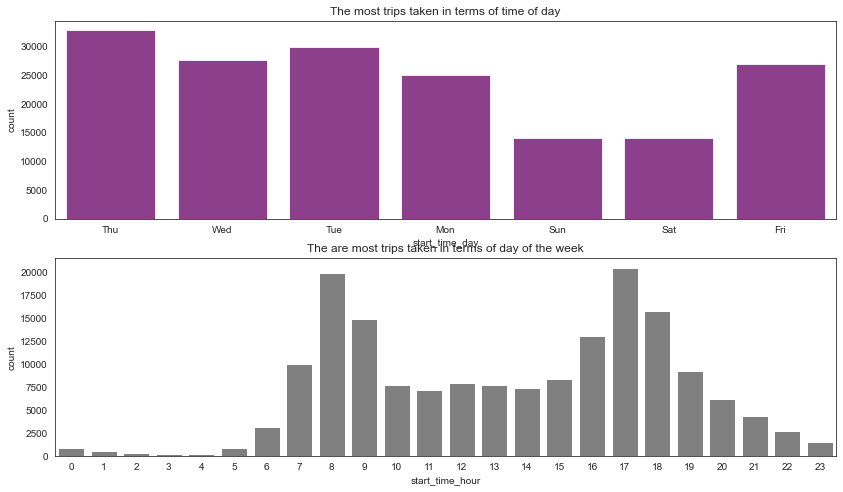

In [23]:
sns.set_style('white')
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = [14, 8])
ax1.set_title('The most trips taken in terms of time of day')
ax2.set_title('The are most trips taken in terms of day of the week')
sns.countplot(data = df_cleaned, x = 'start_time_day', color = 'purple', alpha=0.8, ax = ax1)
sns.countplot(data = df_cleaned, x = 'start_time_hour', color = 'gray', ax = ax2)

- People tend to not go in bike trips during the weekends
- People tend to go for bike trrips early in the morning and the hours before the sunset

### what is the count of trips for each user type?

[Text(0.5, 0, 'Type of user'), Text(0, 0.5, 'Count of rides')]

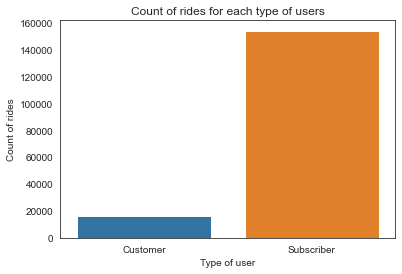

In [24]:
b=sns.countplot(data = df_cleaned, x = 'user_type');
plt.title('Count of rides for each type of users')
b.set(xlabel='Type of user', ylabel='Count of rides')

- Subscribers have x8 more count of rides than customers

### What are the ages of bike riders?

[Text(0.5, 0, 'Age')]

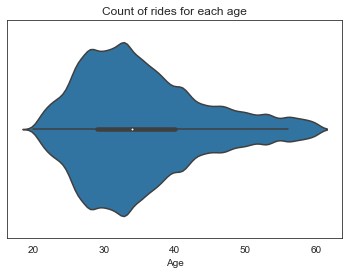

In [25]:
c=sns.violinplot(data = df_cleaned, x = 'member_age');
plt.title('Count of rides for each age')
c.set(xlabel='Age')

- People in their early 30s make the majority of rides count.

### What gender travelled more?

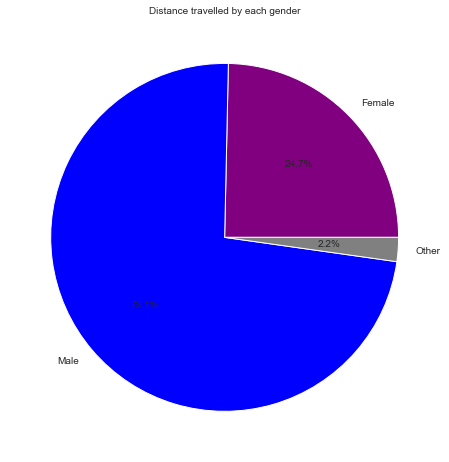

In [26]:
plt.figure(figsize= [8,8])
a = df_cleaned[df_cleaned.member_gender == 'Female'].distance.sum()
b = df_cleaned[df_cleaned.member_gender == 'Male'].distance.sum()
c = df_cleaned[df_cleaned.member_gender == 'Other'].distance.sum()

plt.pie([a, b,c], autopct='%1.1f%%', labels=['Female', 'Male','Other'], colors=["purple","blue", "gray"])
plt.title("Distance travelled by each gender", fontsize=10)
plt.show()

- Females make around quarter of the total distance traveled while males travel almost x3 more.

### what is the trip duration for each gender?

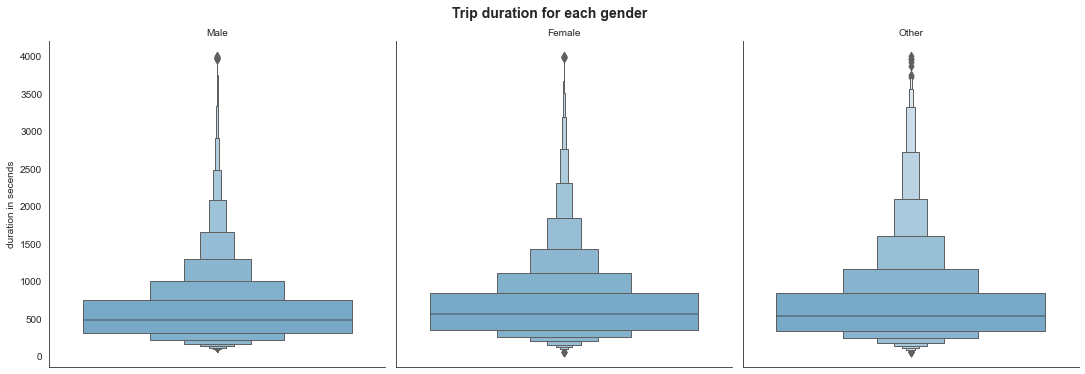

In [27]:
data = df_cleaned.query('duration_sec < 4000')
g = sns.catplot(data=data, y='duration_sec', col="member_gender", kind='boxen', palette = 'Blues')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "duration in secends")
g.fig.suptitle('Trip duration for each gender', y=1.03, fontsize=14, fontweight='semibold');

- females have a higher trip duration than males around 650 secends.

### Does the the count for the start day and hour depend on if a user is a female or male?

In [28]:
Genderdf = df_cleaned.groupby(["member_gender", "start_time_day"]).size().reset_index()
Genderdf

,member_gender,start_time_day,0
0,Female,Fri,6038
1,Female,Mon,5705
2,Female,Sat,3401
3,Female,Sun,3511
4,Female,Thu,7896
5,Female,Tue,7154
6,Female,Wed,6432
7,Male,Fri,20269
8,Male,Mon,18740
9,Male,Sat,10306


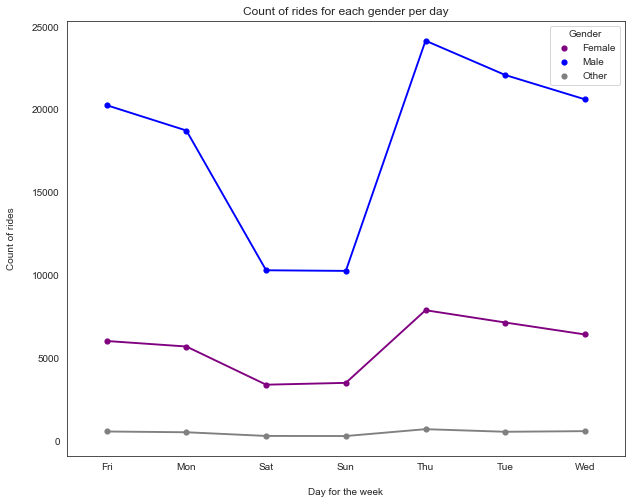

In [29]:
plt.figure(figsize=(10,8))
colors = {'Female':'purple', 'Male':'blue', 'Other':'gray'}
ax = sns.pointplot(x='start_time_day', y=0, hue='member_gender', palette=colors, scale=.7, data=Genderdf)
plt.title('Count of rides for each gender per day')
plt.xlabel('Day for the week', labelpad=16)
plt.ylabel('Count of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Gender')

- Gender has nothing to do with the preferred start date all genders prefer to start on thursdays and weekends seems like an unprefered choice

In [30]:
Genderdf1 = df_cleaned.groupby(["member_gender", "start_time_hour"]).size().reset_index()
Genderdf1

,member_gender,start_time_hour,0
0,Female,0,119
1,Female,1,70
2,Female,2,24
3,Female,3,13
4,Female,4,16
...,...,...,...
67,Other,19,214
68,Other,20,126
69,Other,21,109
70,Other,22,73


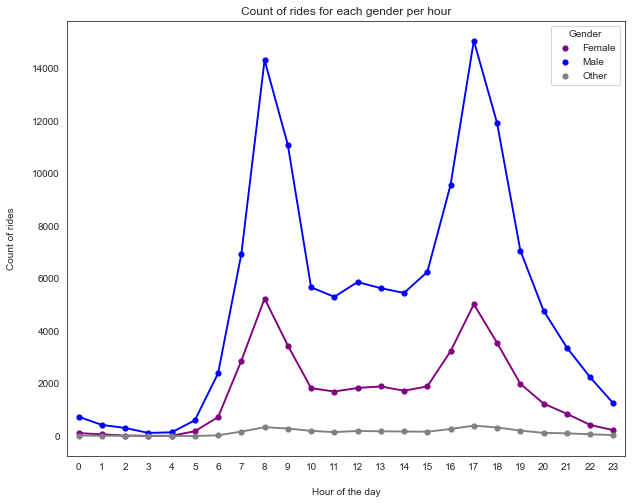

In [31]:
plt.figure(figsize=(10,8))
colors = {'Female':'purple', 'Male':'blue', 'Other':'gray'}
ax = sns.pointplot(x='start_time_hour', y=0, hue='member_gender', palette=colors, scale=.7, data=Genderdf1)
plt.title('Count of rides for each gender per hour')
plt.xlabel('Hour of the day', labelpad=16)
plt.ylabel('Count of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Gender')

- Gender has nothing to do with the preferred start date all genders prefer to start on 8th and 17th day of the month 

In [32]:
Genderdf2 = df_cleaned.groupby(["member_age","member_gender"]).size().reset_index()
Genderdf2

,member_age,member_gender,0
0,20,Female,18
1,20,Male,16
2,21,Female,427
3,21,Male,1249
4,21,Other,2
...,...,...,...
117,59,Male,635
118,59,Other,19
119,60,Female,163
120,60,Male,656


### Is the count of riders affected by gender and age?

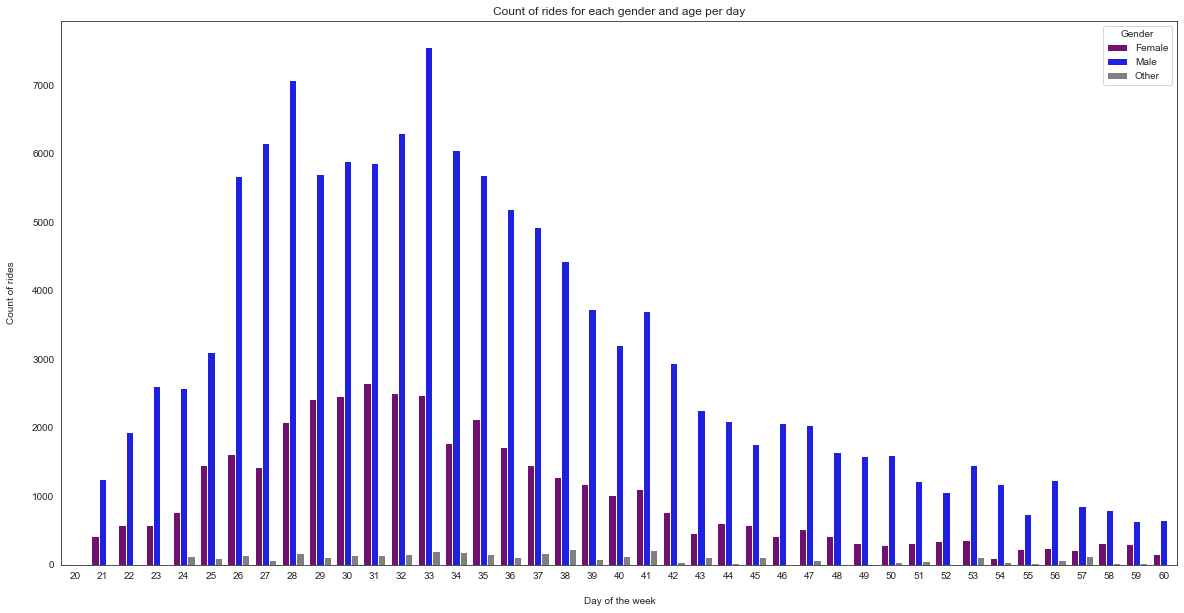

In [33]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="member_age", y=0, hue="member_gender", palette=colors, data=Genderdf2)
plt.title('Count of rides for each gender and age per day')
plt.xlabel('Day of the week', labelpad=16)
plt.ylabel('Count of rides', labelpad=16)
leg = ax.legend()
leg.set_title('Gender')

- Most female bike riders are 31 while males are of age 33. In general, riders are in their late 20s to middel 30s.

### What is the count of rides based on user type and day?

[Text(0.5, 0, 'Start day'), Text(0, 0.5, 'Count of rides')]

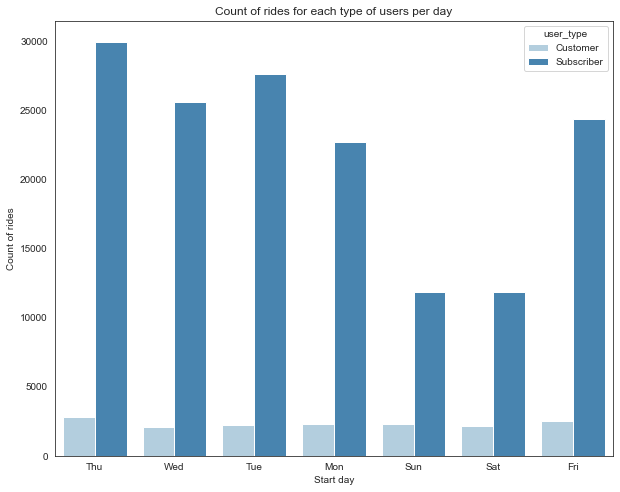

In [34]:
plt.figure(figsize=(10,8))
plt.title('Count of rides for each type of users per day')
d=sns.countplot(data = df_cleaned, x = 'start_time_day', hue = 'user_type', palette = 'Blues');
d.set(xlabel='Start day', ylabel='Count of rides')

- Subscriber tend not to start during the weekend while customers are less likely to start on wednesdays

### What is the trip duration for user type and gender?

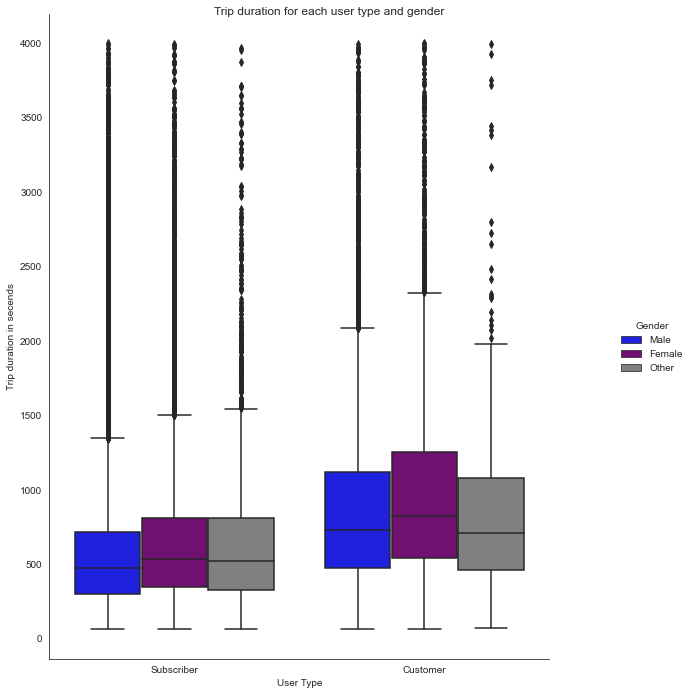

In [35]:
box = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="box", palette = colors)
box.set_axis_labels("User Type", "Trip duration in secends")
box._legend.set_title('Gender')
box.fig.suptitle('Trip duration for each user type and gender');
box.fig.set_size_inches(10,10)

- In general customers has a higher trip duration than customers. males and other gender has same maximum value of duration which is around 550 seconds.

## Summary of main findings


- People tend to not go in bike trips during the weekends
- People tend to go for bike trrips early in the morning and the hours before the sunset
- Subscribers have x8 more count of rides than customers
- People in their early 30s make the majority of rides count.
- Females make around quarter of the total distance traveled while males travel almost x3 more.
- females have a higher trip duration than males around 650 secends.
- Gender has nothing to do with the preferred start date all genders prefer to start on thursdays and weekends seems like an unprefered choice
- Gender has nothing to do with the preferred start date all genders prefer to start on 8th and 17th day of the month 
- Most female bike riders are 31 while males are of age 33. In general, riders are in their late 20s to middel 30s.
- Subscriber tend not to start during the weekend while customers are less likely to start on wednesdays
- In general customers has a higher trip duration than customers. males and other gender has same maximum value of duration which is around 550 seconds.